# Sinais e Sistemas Dinâmicos 2019.2
## Projeto - Sistema de Reconhecimento Facial
### Professor: Derzu Omaia

#### Equipe:

|Nome|Matricula|
|-|-|
|Claudio de Souza Brito |20170023696|
|Gabriel Teixeira Patrício |20170170889|
|Thiago Gonzaga Gomes |11504760|

### Introdução

Como projeto final da disciplina de Sinais e Sistemas Dinâmicos, foi proposta a criação de um sistema de reconhecimento facial, que testaria a base de dados `The ORL Database of Faces (ORL)`, composta por faces de 40 pessoas, cada uma com 10 amostras. Assim, o objetivo do projeto é o reconhecimento facial de uma pessoa dada uma imagem, em um conjunto de amostras.

Dentre as especificações, econtram-se a utilização da `Transformada de Fourier Bidimensional` e o algoritmo `K-Nearest Neighbors (KNN)`. Foi utilizada a linguagem `Python` para o desenvolvimento do projeto, utilizando o framework do `Jupyter`.
Como métrica de distância, foi utilizada a `Distância Euclidiana`, que pode ser expressa pela equação abaixo:

$$DE = {\sqrt {\sum_{i=1}^{n} (q_i - p_i)^2}}$$

### Implementação do Sistema

A metodologia e o fluxograma utilizados no processo de implementação do programa em `Python` consistiu, basicamente, nas instruções presentes no arquivo de especificação.

Inicialmente, seleciona-se apenas 1 das 10 imagens de cada pessoa, de maneira aleatória. Com isso tem-se o objeto de validação (teste), por meio da função `random` da biblioteca `Numpy`. Enquanto as demais imagens da mesma pessoa selecionada são utilizados como objetos para treinamento. Dessa forma, uma vez selecionada a fotografia, é armazenado a menor distância encontrada durante a fase de treinamento, e uma análise de todas as pessoas presentes no banco de amostras é realizado.

A cada imagem do conjunto que é selecionada, é aplicada sobre a mesma a `Transformada de Fourier Bidimensional`, e então, as distâncias entre as componentes da imagem são comparadas, e aquela que obtiver a menor distância é retornada como resultado da operação de reconhecimento facial.


### Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import image
from matplotlib import pyplot
import random
import sys
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from PIL import Image # Biblioteca para o import das imagens

### Definição da Distância Euclidiana

In [3]:
def DE(row):
    soma = 0
    for x in distance_columns:
        soma += (row[x] - selected_player[x]) ** 2
    return math.sqrt(soma)

##  Passo 1:

### Estabelecer o tamanho total de arquivos e o número de fotos de cada pessoa na qual pertence o arquivo

In [4]:
num_file = 40 # 40 subsets de imagens
num_photo = 10 # 10 fotos por subset

## Passo 2:
### Load das imagens

In [15]:
## Importando as imagens utilizando a biblioteca PIL 

# Criação de um array para o teste e o treinamento
trainee = []
person = []


# Seleção aleatória de uma pessoa no dataset
for pasta in range(num_file):
    fot_alea = random.randrange(num_photo)   
    for foto in range(num_photo):
        if foto == fot_alea:
#necessário que a pasta descompactada orl_faces esteja na mesma pasta que o código
            person.append(Image.open(f'orl_faces/s{pasta+1}/{foto+1}.pgm'))
        else:
            trainee.append(Image.open(f'orl_faces/s{pasta+1}/{foto+1}.pgm'))


In [16]:
print(f"Tamanho do dataset: {len(trainee)}")
trainee_tam = len(trainee)

Tamanho do dataset: 360


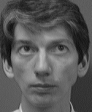

In [17]:
# Display de uma foto aleatória de uma pessoa aleatória que servirá de teste
person[28]

## Passo 3:

### Analisar e preparar as fotos de treinamento

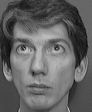

In [18]:
p = 28 # Pessoa #28
f = 4 # Foto #4

trainee[p*9+f] # Display da imagem de treino desejada [9 fotos de cada pessoa]

In [19]:
np.array(trainee[28*9+0]) # Array de treino da Pessoa #28

array([[ 98, 100,  99, ...,  93,  92,  96],
       [ 97, 103,  99, ...,  94,  93,  96],
       [ 98,  97,  98, ...,  92,  93,  95],
       ...,
       [ 85,  92,  91, ...,  50,  56,  48],
       [ 85,  94,  87, ...,  52,  50,  50],
       [ 90,  91,  92, ...,  53,  48,  52]], dtype=uint8)

In [20]:
# Coleção das dimensões da imagem de teste
(largura, comprimento) = np.array(trainee[0].size)

print(largura, comprimento)

92 112


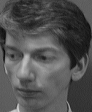

In [21]:
trainee[260] # Foto de treinamento #260 da lista

## Passo 4:
### Manipulação dos datasets com Fourier

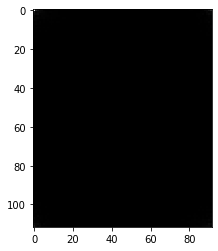

In [22]:
# Criação do array com a transformada de Fourier no dataset de treinamento inicial
trainee_f=[]

for pasta in range(trainee_tam):
        trainee_f.append(np.fft.fft2(trainee[pasta]))
         
plt.imshow(np.abs(trainee_f[8]), cmap = 'gray')

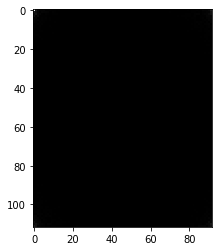

In [23]:
# Criação do array com a transformada de Fourier no dataset de teste inicial
person_f=[]

for pasta in range(num_file):
    person_f.append(np.fft.fft2(person[pasta]))
    
plt.imshow(np.abs(person_f[8]), cmap = 'gray')

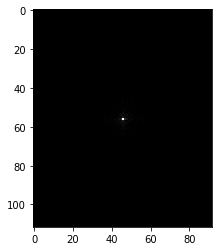

In [24]:
# Deslocamento do conjunto de dados relevantes para o centro da imagem de treinamento
trainee_fourier=[]

for pasta in range(trainee_tam):
        trainee_fourier.append(np.fft.fftshift(trainee_f[pasta]))
        
plt.imshow(np.abs(trainee_fourier[0]), cmap = 'gray')

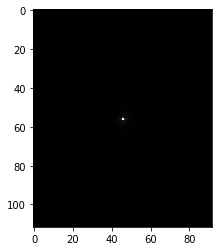

In [25]:
# Deslocamento do conjunto de dados relevantes para o centro da imagem de teste
person_fourier = []
for pasta in range(num_file):
    person_fourier.append(np.fft.fftshift(person_f[pasta]))
    
plt.imshow(np.abs(person_fourier[0]), cmap = 'gray')

In [26]:
np.array(trainee_fourier).shape # Dimensões da imagem

(360, 112, 92)

In [27]:
trainee_fourier[0] # Array de treinamento do índice #0

array([[ 113.        -1.88737914e-15j,  239.57476971+4.05221803e+02j,
         -34.84026581+4.52691610e+02j, ...,
        -174.15729161-2.43096432e+02j,  -34.84026581-4.52691610e+02j,
         239.57476971-4.05221803e+02j],
       [-238.91973119-2.19477792e+02j, -147.5243893 -1.40462380e+02j,
        -181.55605059+1.09223801e+02j, ...,
          43.35606421+3.38519708e+02j, -260.89332439+1.08491914e+02j,
        -511.9490309 -2.23772277e+02j],
       [ -86.44380407-7.26947646e+01j,  -85.6511844 -2.27174055e+02j,
        -120.28381058+1.28027981e+02j, ...,
         290.04525342-2.33063941e+02j, -150.42741784-1.72194291e+02j,
        -110.89841987+1.89484889e+02j],
       ...,
       [ 404.13831378-2.32476892e+02j,  578.74692721-3.40506694e+02j,
         260.01671305+1.36480041e+02j, ...,
         503.17982587+1.49487589e+02j,   62.27840465-2.28689724e+02j,
        -126.64683811+1.33839484e+02j],
       [ -86.44380407+7.26947646e+01j, -110.89841987-1.89484889e+02j,
        -150.42741784+

## Passo 4
### Criação da lista das imagens redimensionadas
É necessária a criação de uma função que retorne apenas a parte relevante da imagem. O input inteiro será as dimensões dos dados utilizáveis da imagem. As dimensões utilizadas nesse projeto vão de 2x2 até 50x50.

In [28]:
# Corte da imagem de acordo com a última dimensão
def zoom(n, image):
    
    # Centro da imagem
    x = comprimento//2
    y = largura//2

    # Raio da área
    r = n//2
    
    # Testando se a imagem é impar
    imp = 0
    if n % 2 != 0:
        imp = -1
    
    
    return image[x-r+imp:x+r, y-r+imp:y+r]

In [29]:
# Declaração do aprendizado
y_train = []
y_true = []
for pasta in range(num_file):
    y_true.append(pasta)
    for foto in range(num_photo-1):
        y_train.append(pasta)

## Passo 5
### Teste utilizando apenas a parte Real

In [30]:
for tam in range(2, 51): #for com os tamanhos das fotos desejados
    trainee_mini = [] # Subset das imagens de treino
    person_mini = [] # Subset das imagens de teste
    y_predict = [] # Array com as predições do KNN
    scores = [] # Array com as acurácias médias do dataset
    scores_num = [] # Índice dos scores obtidos

    # Aplicando na função
    for image in trainee_fourier:
        trainee_mini.append(np.array(zoom(tam, image)).flatten())
    for image in person_fourier:
        person_mini.append(np.array(zoom(tam, image)).flatten())

    x_train = np.array(trainee_mini)

    # Instância do KNN
    classifier = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
    classifier.fit(x_train.real, y_train)
    

    for image in person_mini:
        y_predict.append(classifier.predict([image.real]))

    accuracy = accuracy_score(y_true, y_predict)
    accuracy_num = accuracy_score(y_true, y_predict, normalize=False)
    scores.append(accuracy)
    scores_num.append(accuracy_num)

    # Transformando o array em np_array
    y_predict = np.array(y_predict)

    print("\nAcerto do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), np.mean(scores)*100))
    print("Acerto do teste com a foto {}x{}: {} pessoas".format((tam), (tam), scores_num))
    print("Erro do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), (1-np.mean(scores))*100))


Acerto do teste com a foto 2x2: 85.00%
Acerto do teste com a foto 2x2: [34] pessoas
Erro do teste com a foto 2x2: 15.00%

Acerto do teste com a foto 3x3: 92.50%
Acerto do teste com a foto 3x3: [37] pessoas
Erro do teste com a foto 3x3: 7.50%

Acerto do teste com a foto 4x4: 97.50%
Acerto do teste com a foto 4x4: [39] pessoas
Erro do teste com a foto 4x4: 2.50%

Acerto do teste com a foto 5x5: 97.50%
Acerto do teste com a foto 5x5: [39] pessoas
Erro do teste com a foto 5x5: 2.50%

Acerto do teste com a foto 6x6: 97.50%
Acerto do teste com a foto 6x6: [39] pessoas
Erro do teste com a foto 6x6: 2.50%

Acerto do teste com a foto 7x7: 97.50%
Acerto do teste com a foto 7x7: [39] pessoas
Erro do teste com a foto 7x7: 2.50%

Acerto do teste com a foto 8x8: 97.50%
Acerto do teste com a foto 8x8: [39] pessoas
Erro do teste com a foto 8x8: 2.50%

Acerto do teste com a foto 9x9: 97.50%
Acerto do teste com a foto 9x9: [39] pessoas
Erro do teste com a foto 9x9: 2.50%

Acerto do teste com a foto 10x

## Passo 6
### Teste utilizando apenas a parte Imaginária

In [31]:
for tam in range(2, 51): #for com os tamanhos das fotos desejados  
    trainee_mini = [] # Subset das imagens de treino
    person_mini = [] # Subset das imagens de teste
    y_predict = [] # Array com as predições do KNN
    scores = [] # Array com as acurácias médias do dataset
    scores_num = [] # Índice dos scores obtidos

    # Aplicando na função
    for image in trainee_fourier:
        trainee_mini.append(np.array(zoom(tam, image)).flatten())
    for image in person_fourier:
        person_mini.append(np.array(zoom(tam, image)).flatten())

    x_train = np.array(trainee_mini)

    # Instância do KNN
    classifier = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
    classifier.fit(x_train.imag, y_train)  

    for image in person_mini:
        y_predict.append(classifier.predict([image.imag]))

    accuracy = accuracy_score(y_true, y_predict)
    accuracy_num = accuracy_score(y_true, y_predict, normalize=False)
    scores.append(accuracy)
    scores_num.append(accuracy_num)

    # Transformando o array em np_array
    y_predict = np.array(y_predict)

    print("\nAcerto do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), np.mean(scores)*100))
    print("Acerto do teste com a foto {}x{}: {} pessoas".format((tam), (tam), scores_num))
    print("Erro do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), (1-np.mean(scores))*100))


Acerto do teste com a foto 2x2: 62.50%
Acerto do teste com a foto 2x2: [25] pessoas
Erro do teste com a foto 2x2: 37.50%

Acerto do teste com a foto 3x3: 90.00%
Acerto do teste com a foto 3x3: [36] pessoas
Erro do teste com a foto 3x3: 10.00%

Acerto do teste com a foto 4x4: 95.00%
Acerto do teste com a foto 4x4: [38] pessoas
Erro do teste com a foto 4x4: 5.00%

Acerto do teste com a foto 5x5: 97.50%
Acerto do teste com a foto 5x5: [39] pessoas
Erro do teste com a foto 5x5: 2.50%

Acerto do teste com a foto 6x6: 100.00%
Acerto do teste com a foto 6x6: [40] pessoas
Erro do teste com a foto 6x6: 0.00%

Acerto do teste com a foto 7x7: 100.00%
Acerto do teste com a foto 7x7: [40] pessoas
Erro do teste com a foto 7x7: 0.00%

Acerto do teste com a foto 8x8: 100.00%
Acerto do teste com a foto 8x8: [40] pessoas
Erro do teste com a foto 8x8: 0.00%

Acerto do teste com a foto 9x9: 100.00%
Acerto do teste com a foto 9x9: [40] pessoas
Erro do teste com a foto 9x9: 0.00%

Acerto do teste com a fot

## Passo 7
### Teste utilizando a parte Real + Imaginária
Teste realizado somando as distâncias entre as partes reais e a partes imaginárias

In [32]:
for tam in range(2, 51): #for com os tamanhos das fotos desejados  
    trainee_mini = [] # Subset das imagens de treino
    person_mini = [] # Subset das imagens de teste
    y_predict = [] # Array com as predições do KNN
    scores = [] # Array com as acurácias médias do dataset
    scores_num = [] # Índice dos scores obtidos

    # Aplicando na função
    for image in trainee_fourier:
        trainee_mini.append(np.array(zoom(tam, image)).flatten())
    for image in person_fourier:
        person_mini.append(np.array(zoom(tam, image)).flatten())

    x_train = np.array(trainee_mini)

    # Instância do KNN
    classifier = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
    classifier.fit(x_train.real+x_train.imag, y_train)

    for image in person_mini:
        y_predict.append(classifier.predict([image.real+image.imag]))
        
    accuracy = accuracy_score(y_true, y_predict)
    accuracy_num = accuracy_score(y_true, y_predict, normalize=False)
    scores.append(accuracy)
    scores_num.append(accuracy_num)
    print("\nAcerto do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), np.mean(scores)*100))
    print("Acerto do teste com a foto {}x{}: {} pessoas".format((tam), (tam), scores_num))
    print("Erro do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), (1-np.mean(scores))*100))


Acerto do teste com a foto 2x2: 75.00%
Acerto do teste com a foto 2x2: [30] pessoas
Erro do teste com a foto 2x2: 25.00%

Acerto do teste com a foto 3x3: 95.00%
Acerto do teste com a foto 3x3: [38] pessoas
Erro do teste com a foto 3x3: 5.00%

Acerto do teste com a foto 4x4: 97.50%
Acerto do teste com a foto 4x4: [39] pessoas
Erro do teste com a foto 4x4: 2.50%

Acerto do teste com a foto 5x5: 97.50%
Acerto do teste com a foto 5x5: [39] pessoas
Erro do teste com a foto 5x5: 2.50%

Acerto do teste com a foto 6x6: 97.50%
Acerto do teste com a foto 6x6: [39] pessoas
Erro do teste com a foto 6x6: 2.50%

Acerto do teste com a foto 7x7: 100.00%
Acerto do teste com a foto 7x7: [40] pessoas
Erro do teste com a foto 7x7: 0.00%

Acerto do teste com a foto 8x8: 100.00%
Acerto do teste com a foto 8x8: [40] pessoas
Erro do teste com a foto 8x8: 0.00%

Acerto do teste com a foto 9x9: 100.00%
Acerto do teste com a foto 9x9: [40] pessoas
Erro do teste com a foto 9x9: 0.00%

Acerto do teste com a foto 

## Passo 8
### Teste utilizando parte Real e Imaginária
Teste realizado como se cada parte fosse uma imagem separada

In [33]:
for tam in range(2, 51): #for com os tamanhos das fotos desejados 
    trainee_mini = [] # Subset das imagens de treino
    person_mini = [] # Subset das imagens de teste
    y_predict = [] # Array com as predições do KNN
    scores = [] # Array com as acurácias médias do dataset
    scores_num = [] # Índice dos scores obtidos

    # Aplicando na função
    for image in trainee_fourier:
        trainee_mini.append(np.array(zoom(tam, image)).flatten())
    for image in person_fourier:
        person_mini.append(np.array(zoom(tam, image)).flatten())

    x_train = np.array(trainee_mini)

    # Instância do KNN
    classifier_real = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
    classifier_imag = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
    classifier_real_imag = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
    classifier_imag_real = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
    
    classifier_real.fit(x_train.real, y_train)
    classifier_imag.fit(x_train.imag, y_train)
    classifier_real_imag.fit(x_train.real, y_train)
    classifier_imag_real.fit(x_train.imag, y_train)

    for image in person_mini:
        y_predict_real=(classifier_real.predict([image.real]))
        y_predict_imag=(classifier_imag.predict([image.imag]))
        y_predict_real_imag=(classifier_real_imag.predict([image.imag]))
        y_predict_imag_real=(classifier_imag_real.predict([image.real]))
    
        menor_distancia = [y_predict_real, y_predict_imag, y_predict_real_imag, y_predict_imag_real]
        me = sorted(menor_distancia)[0]
        y_predict.append(me)
    
    accuracy = accuracy_score(y_true, y_predict)
    accuracy_num = accuracy_score(y_true, y_predict, normalize=False)
    scores.append(accuracy)
    scores_num.append(accuracy_num)

    # Transformando o array em np_array
    y_predict = np.array(y_predict)

    print("\nAcerto do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), np.mean(scores)*100))
    print("Acerto do teste com a foto {}x{}: {} pessoas".format((tam), (tam), scores_num))
    print("Erro do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), (1-np.mean(scores))*100))


Acerto do teste com a foto 2x2: 52.50%
Acerto do teste com a foto 2x2: [21] pessoas
Erro do teste com a foto 2x2: 47.50%

Acerto do teste com a foto 3x3: 55.00%
Acerto do teste com a foto 3x3: [22] pessoas
Erro do teste com a foto 3x3: 45.00%

Acerto do teste com a foto 4x4: 42.50%
Acerto do teste com a foto 4x4: [17] pessoas
Erro do teste com a foto 4x4: 57.50%

Acerto do teste com a foto 5x5: 35.00%
Acerto do teste com a foto 5x5: [14] pessoas
Erro do teste com a foto 5x5: 65.00%

Acerto do teste com a foto 6x6: 52.50%
Acerto do teste com a foto 6x6: [21] pessoas
Erro do teste com a foto 6x6: 47.50%

Acerto do teste com a foto 7x7: 45.00%
Acerto do teste com a foto 7x7: [18] pessoas
Erro do teste com a foto 7x7: 55.00%

Acerto do teste com a foto 8x8: 42.50%
Acerto do teste com a foto 8x8: [17] pessoas
Erro do teste com a foto 8x8: 57.50%

Acerto do teste com a foto 9x9: 37.50%
Acerto do teste com a foto 9x9: [15] pessoas
Erro do teste com a foto 9x9: 62.50%

Acerto do teste com a f

## Passo 9
### Teste utilizando Merge
Teste reailizado combinando as partes imaginárias e reais em uma parte combinada, que é a soma dos módulos da parte real e imaginária

In [34]:
for tam in range(2, 51): #for com os tamanhos das fotos desejados 
    trainee_mini = [] # Subset das imagens de treino
    person_mini = [] # Subset das imagens de teste
    y_predict = [] # Array com as predições do KNN
    scores = [] # Array com as acurácias médias do dataset
    scores_num = [] # Índice dos scores obtidos

    # Aplicando na função
    for image in trainee_fourier:
        trainee_mini.append(np.array(zoom(tam, image)).flatten())
    for image in person_fourier:
        person_mini.append(np.array(zoom(tam, image)).flatten())

    x_train = np.array(trainee_mini)

    # Instância do KNN
    classifier_ab = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
    
    ab = abs(x_train)
    classifier_ab.fit(ab, y_train)

    for image in person_mini:
        y_predict.append(classifier_ab.predict([abs(image)]))
    
    accuracy = accuracy_score(y_true, y_predict)
    accuracy_num = accuracy_score(y_true, y_predict, normalize=False)
    scores.append(accuracy)
    scores_num.append(accuracy_num)

    # Transformando o array em np_array
    y_predict = np.array(y_predict)

    print("\nAcerto do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), np.mean(scores)*100))
    print("Acerto do teste com a foto {}x{}: {} pessoas".format((tam), (tam), scores_num))
    print("Erro do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), (1-np.mean(scores))*100))


Acerto do teste com a foto 2x2: 82.50%
Acerto do teste com a foto 2x2: [33] pessoas
Erro do teste com a foto 2x2: 17.50%

Acerto do teste com a foto 3x3: 97.50%
Acerto do teste com a foto 3x3: [39] pessoas
Erro do teste com a foto 3x3: 2.50%

Acerto do teste com a foto 4x4: 97.50%
Acerto do teste com a foto 4x4: [39] pessoas
Erro do teste com a foto 4x4: 2.50%

Acerto do teste com a foto 5x5: 97.50%
Acerto do teste com a foto 5x5: [39] pessoas
Erro do teste com a foto 5x5: 2.50%

Acerto do teste com a foto 6x6: 97.50%
Acerto do teste com a foto 6x6: [39] pessoas
Erro do teste com a foto 6x6: 2.50%

Acerto do teste com a foto 7x7: 97.50%
Acerto do teste com a foto 7x7: [39] pessoas
Erro do teste com a foto 7x7: 2.50%

Acerto do teste com a foto 8x8: 97.50%
Acerto do teste com a foto 8x8: [39] pessoas
Erro do teste com a foto 8x8: 2.50%

Acerto do teste com a foto 9x9: 97.50%
Acerto do teste com a foto 9x9: [39] pessoas
Erro do teste com a foto 9x9: 2.50%

Acerto do teste com a foto 10x

## Resultados e Conclusão

Após a aplicação dos testes realizado entre os passos 5 e 9, observa-se que:
    - O teste usando apenas a parte real começou com 85%, chegou a 97,5% em 4x4 e não subiu mais.
    - O teste usando apenas a parte imaginária começou com 62,5%, mas chegou em 100% no 6x6.
    - O teste usando ambas as partes começou com 75% e chegou em 100% no 7x7.
    - O teste de usar o classificador de um tipo com a base de outro tipo não conseguiu valores maiores que 55%
    - O teste usando merge começou com 82,5% e chegou em 97,5% rapidamente em 3x3, mas estancou ali.
    
Dessa forma podemos concluir que o melhor começo pertence apenas a parte real, se você quer alcancar os 100% mais cedo você deve usar apenas a parte imaginária, e o melhor resultado geral pertence a união das duas partes.

A taxa de acerto obtida nos testes correspondeu as expectativas da aplicação. A evolução dos métodos de utilização das partes imaginária/real é claramente observável com a diferença das taxas de acerto dentre os métodos em questão.

Conclui-se então que a aplicação da Transformada de Fourier nas imagens para reconhecimento facial é um excelente método para aplicar o conhecimento adquirido durante a disciplina de Sinais e Sistemas Dinâmicos, uma vez que é possível observar na prática como tais modelos matemáticos podem realizar o tratamento de dados e sinais diversos para solução de problemas atuais.
